In [1]:
# Training & Test Data: https://drive.google.com/drive/folders/1TfdPJfSQ5h4U5-CQhbH8jkkeNhC2EZkG?usp=sharing


In [2]:
## Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

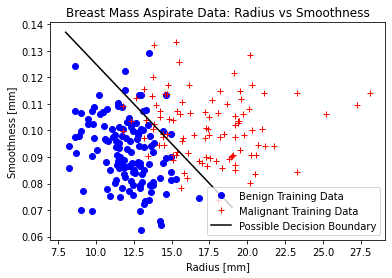

In [3]:
## Plot Post Processed Data
# Get file path
path = "/Users/blake/Documents/COMS 4995 - DL CV/HW1/"
fn = "HW1 Post Processed Training Data.xlsx"

# Read post processed data data
df = pd.read_excel(path+fn)

# Separate data into benign and malignant
bRadius = []
bSymmetry = []
bSmoothness = []

mRadius = []
mSymmetry = []
mSmoothness = []

for i in range(df.shape[0]):
    if(df.at[i,'Diagnosis'] == 'B'):
        bRadius.append(df.at[i,"Radius"])
        bSymmetry.append(df.at[i,"Symmetry"])
        bSmoothness.append(df.at[i,"Smoothness"])
        
    elif(df.at[i,'Diagnosis'] == 'M'):
        mRadius.append(df.at[i,"Radius"])
        mSymmetry.append(df.at[i,"Symmetry"])
        mSmoothness.append(df.at[i,"Smoothness"])
        
    else:
        raise Exception("Diagnosis is invalid.")


# Obtain priors
priorB = len(bRadius)/(len(bRadius) + len(mRadius))
priorM = len(mRadius)/(len(bRadius) + len(mRadius))

# Plot Processed Data (#1)
plt.figure(1)
plt.title("Breast Mass Aspirate Data: Radius vs Smoothness")
plt.plot(bRadius,bSmoothness,'bo',label="Benign Training Data")
plt.plot(mRadius,mSmoothness,'r+',label="Malignant Training Data")

## Draw Possible Decision Boundary (#1)
xData = np.linspace(8,19,100)
m = -.006
b = .185
margin = .01
yData = xData * m +  b
plt.plot(xData,yData,'k-',label="Possible Decision Boundary")
#plt.plot(xData,yData-margin,'k--')
#plt.plot(xData,yData+margin,'k--')

# Plot data
plt.xlabel("Radius [mm]")
plt.ylabel("Smoothness [mm]")
plt.legend(loc="lower right")
plt.show()

In [4]:
## Get means & standard deviations
mean_bRadius = np.mean(bRadius)
mean_bSmoothness = np.mean(bSmoothness)
mean_bSymmetry = np.mean(bSymmetry)

mean_mRadius = np.mean(mRadius)
mean_mSmoothness = np.mean(mSmoothness)
mean_mSymmetry = np.mean(mSymmetry)

std_bRadius = np.std(bRadius)
std_bSmoothness = np.std(bSmoothness)
std_bSymmetry = np.std(bSymmetry)

std_mRadius = np.std(mRadius)
std_mSmoothness = np.std(mSmoothness)
std_mSymmetry = np.std(mSymmetry)

# Concatenate into a list for simplicity
means_b = [mean_bRadius, mean_bSmoothness, mean_bSymmetry]
means_m = [mean_mRadius, mean_mSmoothness, mean_mSymmetry]

stds_b = [std_bRadius, std_bSmoothness, std_bSymmetry]
stds_m = [std_mRadius, std_mSmoothness, std_mSymmetry]

In [5]:
## Create Gaussian & Posterior probability functions:

# Gaussian (normal) distribution function
def gaussian(x,mean,sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x-mean)**2 / (2*sigma**2))

# Posterior probability function
def posterior(X,whichClass):
    # First, iterate through all the features and calculate the likelihood function
    postProb = 1
    if whichClass == 'M':
        means = means_m
        stds = stds_m
        prior = priorM
    elif whichClass == 'B':
        means = means_b
        stds = stds_b
        prior = priorB
    else:
        raise Exception("Incorrect class given.")
    
    for i in range(len(X)):
        postProb = postProb * gaussian(X[i],means[i],stds[i])

    # Then, multiply by the prior 
    postProb = postProb * prior
    return postProb

def classify(X):
    hasCancer = posterior(X,'M')
    noCancer = posterior(X,'B')
    
    if(noCancer > hasCancer):
        return 'B'
    else:
        return 'M'

In [6]:
## Experiment With Test Data
# Read test file
fn2 = "HW1 Post Processed Test Data.xlsx"
df = pd.read_excel(path+fn2)

correctCount = 0
incorrectCount = 0

for i in range(df.shape[0]):
    radius = df.at[i,"Radius"]
    symmetry = df.at[i,"Symmetry"]
    smoothness = df.at[i,"Smoothness"]
    diagnosis = df.at[i,'Diagnosis']
    
    data = [radius, smoothness, symmetry]
    decision = classify(data)

    if(diagnosis == decision):
        correctCount+=1
    else:
        incorrectCount+=1
    
print("Correct count:",correctCount)
print("Incorrect count:",incorrectCount)
print("Classifier Efficiency: ",round((correctCount)/(correctCount+incorrectCount)*100),"%",sep="")
        

Correct count: 146
Incorrect count: 11
Classifier Efficiency: 93%


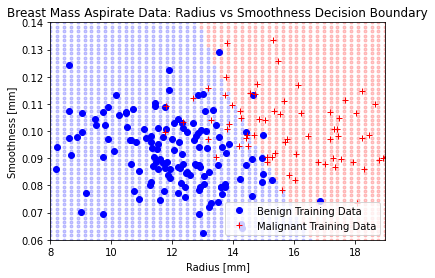

In [7]:
## Plot decision boundary for two of the parameters

# Create Figure
plt.figure(2)

## Draw Possible Decision Boundary (#1)
radiusData = np.linspace(8,19,50)
smoothnessData = np.linspace(.06,.14,50)
constantSymmetry = (mean_mSymmetry + mean_bSymmetry)/2
for radius in radiusData:
    for smoothness in smoothnessData:
        data = [radius, smoothness, constantSymmetry]
        decision = classify(data)
        if(decision == 'B'):
            plotAttributes = 'b.'
        else:
            plotAttributes = 'r.'
        plt.plot(radius,smoothness,plotAttributes,alpha=.2)
        

# Plot Training Data
plt.plot(bRadius,bSmoothness,'bo',label="Benign Training Data")
plt.plot(mRadius,mSmoothness,'r+',label="Malignant Training Data")

# Plot Figure
plt.title("Breast Mass Aspirate Data: Radius vs Smoothness Decision Boundary")
plt.xlabel("Radius [mm]")
plt.ylabel("Smoothness [mm]")
plt.axis([8,19,.06,.14])
plt.legend(loc = "lower right")
plt.show()

In [8]:
## Questions: 
# Q1: Are these good fits to your data?
# A1: The fit is fairly good; however, there are a decent amount of outliers that require higher order parameters
#     (such as the mass' symmetry) in order to accurately classify all data

# Q2: How does this decision boundary differ from the one you drew by hand?
# A2: The decision boundary is fairly close to the one I drew as it is linear and near the same margin I detailed.
#     However, the slope and y-intercept are slightly different.